# Avoid the data Leakage

In [1]:
import numpy as np
from luwiji.knn import illustration

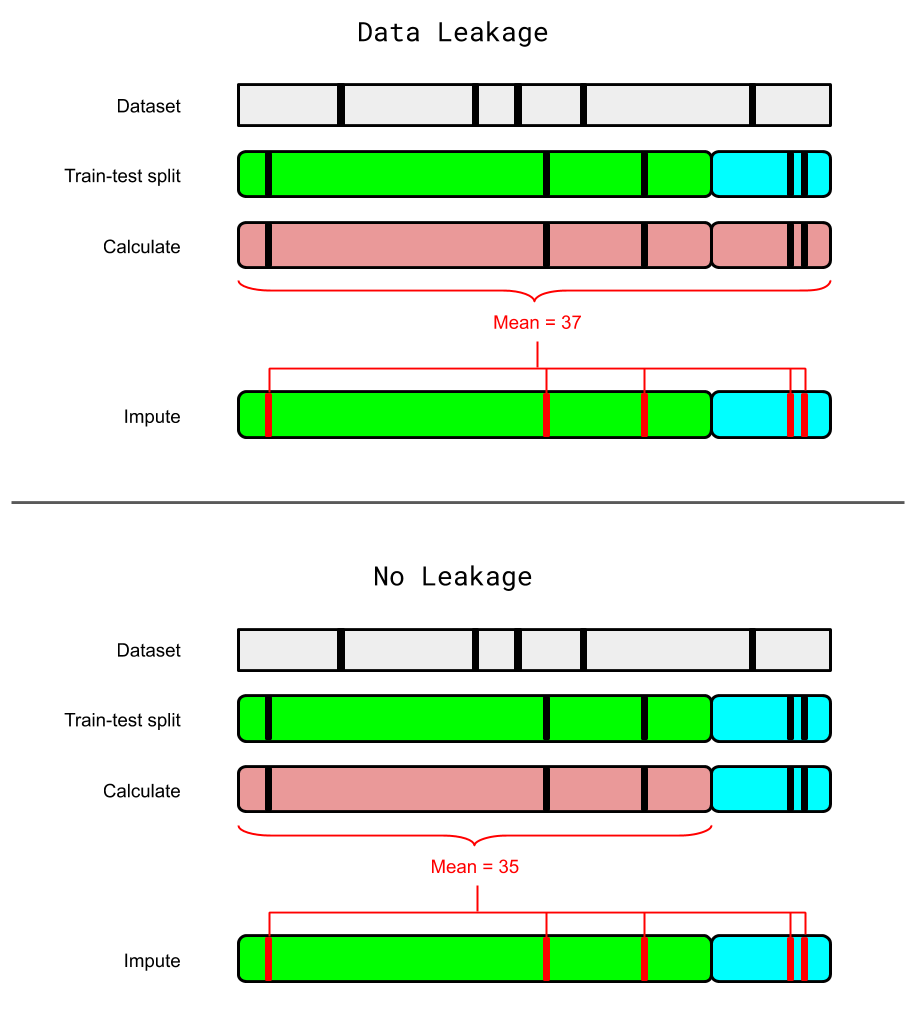

In [2]:
illustration.data_leakage

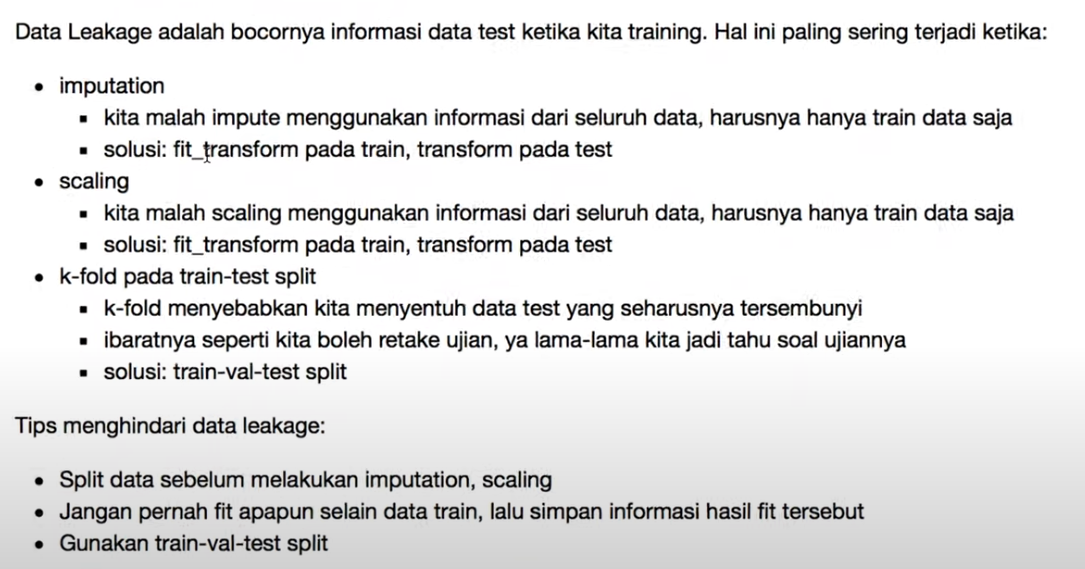

# Train-val-test split

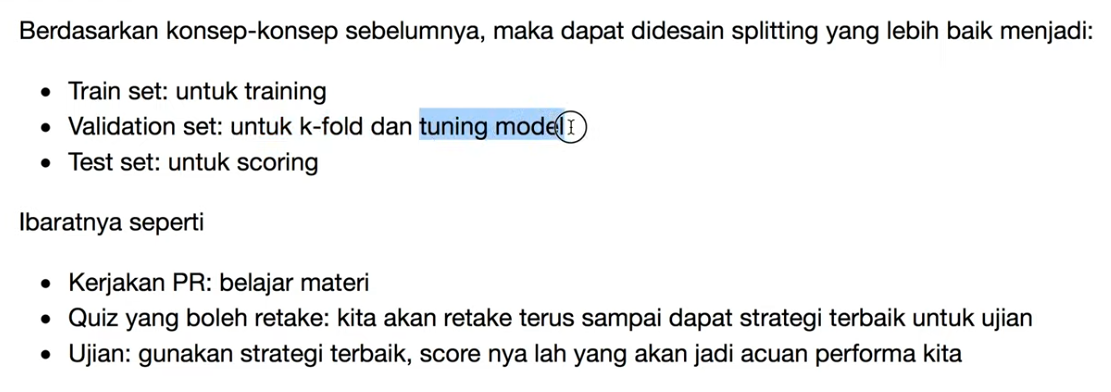

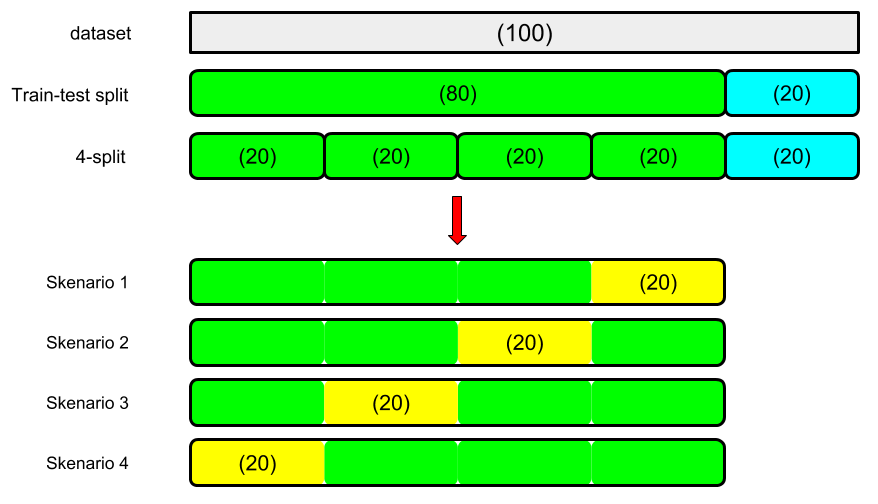

In [3]:
illustration.train_val_test

# Siapkan data tanpa fillna dan get_gummies

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('data/titanic.csv', index_col="PassengerId")
df.drop(columns=['Name', 'Ticket', 'Age', 'Cabin'], inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [7]:
X = df.drop(columns='Survived')
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

## Preprocessor

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [8]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder())
])

In [9]:
from sklearn.compose import ColumnTransformer

In [10]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
693,3,male,0,0,56.4958,S
482,2,male,0,0,0.0000,S
528,1,male,0,0,221.7792,S
856,3,female,0,1,9.3500,S
802,2,female,1,1,26.2500,S


In [11]:
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ['SibSp', 'Parch', 'Fare']),
    ("categoric", categorical_pipeline, ['Pclass', 'Sex', 'Embarked'])
])

## Pipeline

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch', 'Fare']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                           

In [15]:
pipeline.score(X_test, y_test)

0.776536312849162

### GridSearchCV

### Tuning dan Cross Validation menggunakan GridSearchCV 
cv = cross validation

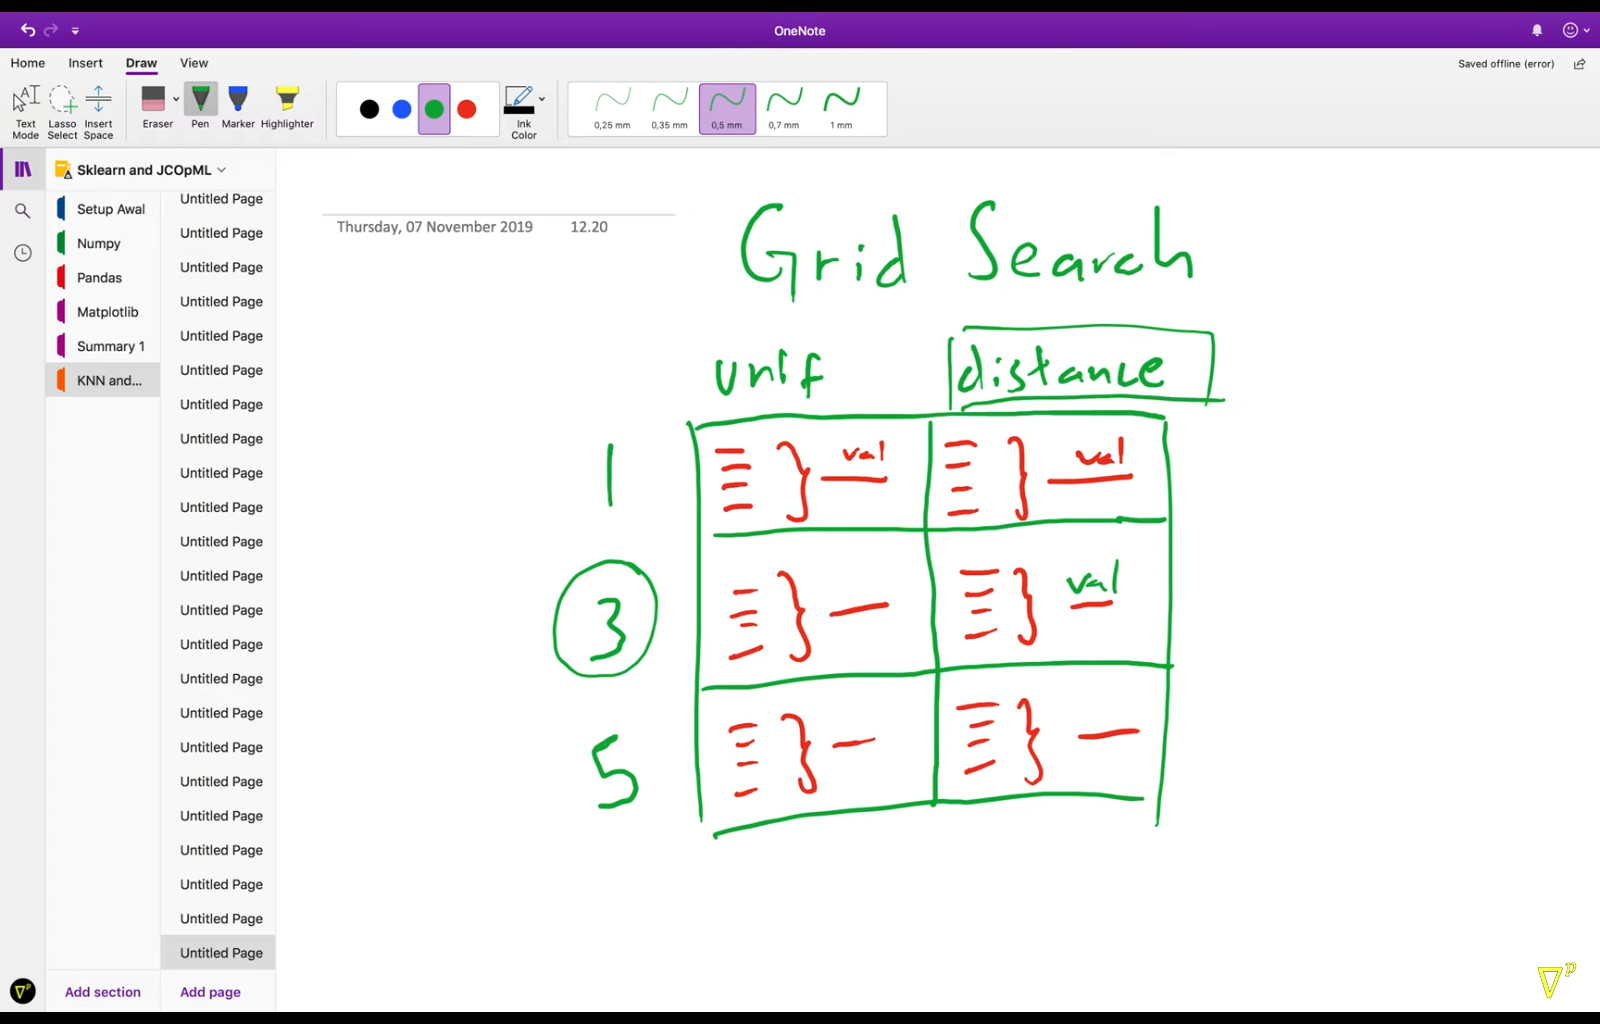

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
pipeline.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', MinMaxScaler())]),
                                    ['SibSp', 'Parch', 'Fare']),
                                   ('categoric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehot', OneHotEncoder())]),
                                    ['Pclass', 'Sex', 'Embarked'])])),
  ('algo', KNeighborsClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('scaler', MinMaxScaler())]),
                                  ['SibSp', 'Parch', 'Fare'

In [18]:
parameter = {
    'algo__n_neighbors':range(1,51,2),
    'algo__weights':['uniform', 'distance'],
    'algo__p':[1, 2]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1) 
#verbose = report sudah berapa train yang selesai tampilin sedikit report
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('impu

In [19]:
pd.DataFrame(model.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_neighbors,param_algo__p,param_algo__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
40,0.016387,0.000491,0.035400,0.004100,21,1,uniform,"{'algo__n_neighbors': 21, 'algo__p': 1, 'algo_...",0.815126,0.818565,0.810127,0.814606,0.003465,1
36,0.014762,0.002482,0.023243,0.001676,19,1,uniform,"{'algo__n_neighbors': 19, 'algo__p': 1, 'algo_...",0.815126,0.818565,0.805907,0.813200,0.005344,2
24,0.015962,0.002118,0.027991,0.004967,13,1,uniform,"{'algo__n_neighbors': 13, 'algo__p': 1, 'algo_...",0.819328,0.810127,0.810127,0.813194,0.004337,3
28,0.018025,0.003584,0.029896,0.001257,15,1,uniform,"{'algo__n_neighbors': 15, 'algo__p': 1, 'algo_...",0.819328,0.810127,0.810127,0.813194,0.004337,3
38,0.015368,0.003994,0.022125,0.002203,19,2,uniform,"{'algo__n_neighbors': 19, 'algo__p': 2, 'algo_...",0.815126,0.814346,0.805907,0.811793,0.004174,5


In [20]:
model.best_params_

{'algo__n_neighbors': 21, 'algo__p': 1, 'algo__weights': 'uniform'}

In [21]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8174157303370787, 0.7821229050279329)

In [22]:
model.best_score_

0.8146060111808436

# Prediction

In [ ]:
illustration.jack_and_rose

In [ ]:
X.iloc[0:1]

In [ ]:
data = [
    [1, 'female', 1, 1, 80, 'S'],
    [3, 'male', 0, 0, 5, 'S']
]

X_pred = pd.DataFrame(data, index=['Rose', 'Jack'], columns=X.columns)

In [ ]:
X_pred

In [ ]:
model.predict(X_pred)

In [ ]:
X_pred['Survived'] = model.predict(X_pred)
X_pred

# Save Model

In [ ]:
from jcopml.utils import save_model

In [ ]:
save_model(model, 'knn_titanic.pkl')

In [ ]:
model

In [ ]:
model.best_estimator_ #only model

In [ ]:
save_model(model.best_estimator_, 'knn_titanic_small.pkl')

# Load model

In [ ]:
from jcopml.utils import load_model

In [ ]:
model_yang_diload = load_model("model/knn_titanic_small.pkl")

In [ ]:
model_yang_diload.predict(X_pred)

In [ ]:
model_cv = load_model("model/knn_titanic.pkl")

In [ ]:
pd.DataFrame(model_cv.cv_results_).head()

# Optional (Pickling Object in Python)

In [ ]:
import pickle, os

In [ ]:
os.makedirs('coba', exist_ok=True)

In [ ]:
pickle.dump(model, open("coba/knn.pkl", 'wb')) #write binary

In [ ]:
model = pickle.load(open("coba/knn.pkl", 'rb')) #read binary

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])